### Real World - Starting from Scratch!

The purpose of this exercise is to investigate two things and check for correlation.
1. The increase in levels of concussion in Sport - looking specifically at Rugby
2. Increasing size of Rugby over the years since it went profreesional.

https://www.irishtimes.com/sport/other-sports/increasing-size-of-players-behind-rise-of-concussion-in-sport-1.2041465 
Th Irish Times article called out some interesting data in relation to Rugby presented in a report to the Oireachtas back in 2014 which linked the increasing size or player to an increase in concussion rates.

- IRB figures show that over the last 15 years there has been, on average, a 10 per cent increase in player weight
-  five per cent drop in the average time for the 10m sprint
- average number of tackles in rugby has risen from 160 per match to 220

https://www.theguardian.com/sport/2013/dec/14/rugby-union-concussion-medical-experts

https://www.telegraph.co.uk/rugby-union/2016/03/02/big-hits-in-modern-rugby-are-turning-parents-off-the-game/




http://edition.cnn.com/2014/05/27/sport/rugby-sporting-physique-compared/index.html?hpt=hp_c3


ABSTRACTObjectives  To investigate the evolution of anthropometric characteristics in World Cup rugby players and identify elements associated with performance.Design  Age, weight and height were collected for 2692 World Cup rugby players as well as rankings in each World Cup, and collective experience of winners, ﬁ nalists, semiﬁ nalists and quarter ﬁ nalists in comparison to the rest of the competitors. Anthropometric parameters were compared according to age and position (back and forwards).Results  From 1987 to 2007, forwards and backs have become heavier by 6.63 and 6.68 kg and taller by 0.61 and 1.09 cm, respectively. The collective experience of the forwards’ pack is a value increasing with the ﬁ nal ranking attained, as well as the weight of forwards and the height of backs.Conclusions  For all Rugby World Cups, the highest performing teams have the tallest backs and heaviest forwards with the highest percentage of collective 

(PDF) How they won Rugby World Cup through height, mass and collective experience. Available from: https://www.researchgate.net/publication/221846203_How_they_won_Rugby_World_Cup_through_height_mass_and_collective_experience [accessed Dec 13 2018].
https://www.researchgate.net/publication/221846203_How_they_won_Rugby_World_Cup_through_height_mass_and_collective_experience




### Scenario
I want to measure the "On Time Delivery" performance of delivery of Products to our customers to determine if we are hitting the commitments communicated at the time of ordering.

Where we are missing the customer commit - where are we missing and what are the root causes.

We ship 4 product offerings : LowEnd, Good, Better, Super
There is a manufacturing lead time target on each in days: 2, 3, 3, 4
We supply 5 countries: UK, Germany, France, Netherlands, Spain.
There is a logistics lead time target on each in days: 2, 4, 3, 3, 5
Target to hit "On Time Delivery" is to come in under Manufacturing + Logistics Lead time
The idea is to determine how we are performing to the target Lead times promised Where we are off target what are the factors and do we need to change the commitments to the customer?

### Creating the Dataset 

https://www.youtube.com/watch?v=hUes6y2b--0

In [84]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import seaborn as sns

In [85]:
df= pd.read_csv(r"C:\Users\john_j_o'neill\RealWorld\RealWorld\munster.csv")

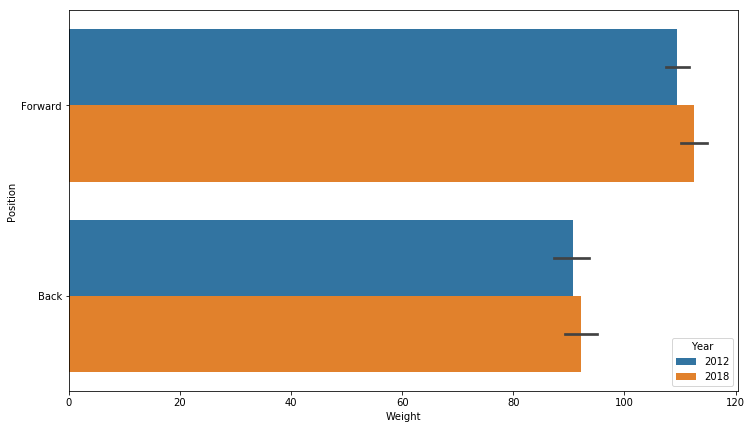

In [92]:
plt.figure(figsize=(12, 7))#setting plot size
sns.barplot(x="Weight",y="Position",hue="Year",data=df) #seaborn boxplot calling on one variable in x axis for Height

### Creating a Dataframe

Using this as a refernece point and study aid
https://pandas.pydata.org/pandas-docs/stable/10min.html#object-creation

Initally creating an empty Dataframe which will be populated using the numpy.random library to generate data and populate the columns.

In order to simulate the required data a number of steps are to be folloed initially.
1. Create an empty Dataframe of 500 sample size
2. Populate each column with generated data to build a table to be used later to investigate the dataset.

In [58]:
df = pd.DataFrame(columns=['Product','Country','MLT','LLT'],index=range(1,200))
df.head(3)
#https://cmdlinetips.com/2018/01/how-to-create-pandas-dataframe-from-multiple-lists/

,Product,Country,MLT,LLT
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


The "Product" selection is split accross the portfolio in accordance with the probability of that particular product being ordered. EG 15% likelihood that "LowEnd" will be ordered.

In [59]:
prod=pd.Categorical(["LowEnd","Good","Better","Best"])
np.random.seed()
df['Product'] = np.random.choice(list(prod),len(df),p=[0.15,0.35,0.30,0.20])
df.head(5)

,Product,Country,MLT,LLT
1,Better,NaN,NaN,NaN
2,Good,NaN,NaN,NaN
3,Best,NaN,NaN,NaN
4,LowEnd,NaN,NaN,NaN
5,Good,NaN,NaN,NaN


In [60]:
countries = {"UK", "Germany", "France", "Netherlands", "Spain"}
df['Country'] = np.random.choice(list(countries), len(df))
df.head(5)

,Product,Country,MLT,LLT
1,Better,Netherlands,NaN,NaN
2,Good,France,NaN,NaN
3,Best,UK,NaN,NaN
4,LowEnd,France,NaN,NaN
5,Good,France,NaN,NaN


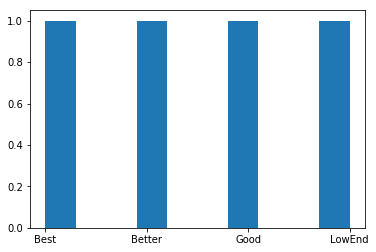

In [61]:
# Randomly select a list of Products Sold (restricted by setting probability)
#Product=["LowEnd","Good","Better","Best"]
#x=np.random.choice(Product,500,p=[0.15,0.35,0.30,0.20]) #p sets the probability
#np.random.seed(124)
plt.hist(prod)
plt.show()



    ### Using Date Time as an Index converts the entire Dataframe into a TIme Series. date range gives a series of time stamps.
    https://campus.datacamp.com/courses/manipulating-time-series-data-in-python/working-with-time-series-in-pandas?ex=1

In [62]:
# index creation
ind= pd.date_range(start="29-09-2018", periods=25,freq="D")

In [63]:
ind

DatetimeIndex(['2018-09-29', '2018-09-30', '2018-10-01', '2018-10-02',
               '2018-10-03', '2018-10-04', '2018-10-05', '2018-10-06',
               '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10',
               '2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14',
               '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18',
               '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-22',
               '2018-10-23'],
              dtype='datetime64[ns]', freq='D')

In [64]:
df['Order_Date']=np.random.poisson(2,len(ind)),index=(ind)
df.head(3)

SyntaxError: can't assign to function call (<ipython-input-64-e703d0fbf793>, line 1)

to add a new column to the dataframe just do
df["header"]= pd... whatever (df[",,,,"])

In [10]:
df["Order_Number"]=np.random.int

AttributeError: module 'numpy.random' has no attribute 'int'

https://math.stackexchange.com/questions/1335829/default-positive-non-negative-probability-distribution
Similarly, SAT (and other) exam scores are sometimes described as normal, totally ignoring the minuscule probability that would correspond to nonexistent negative scores.

The gamma family of distributions places all its probability on the positive half-line. Gamma distributions are right-skewed with mode < median < mean. The shape is governed by a shape parameter.

Exponential distributions are members of this family with shape parameter 1; strongly skewed with no left sided tail. For larger shape parameters the distribution has a left sided tail and a somewhat more pronounced right sided tail. See graphs of various gamma densities in the Wikipedia article. (A scale or rate parameter helps to determine the variance of a gamma distribution.)

Gamma distributions are used to model waiting times, and many other phenomena in social, biological, and physical sciences. The gamma family of distributions is not as widely used as the normal family, but if any family of continuous distributions can be described as the 'default' non-negative family, the gamma family would be the prime candidate.

In queueing theory (concerned with the behavior of waiting lines), gamma distributions with integer shape parameters are called Erlang distributions. The chi-squared family is another sub-family of gamma.

A few other particularly useful continuous non-negative families, among many, are the lognormal (taking logs of data produces normality), Weibull, Rayleigh and Pareto. (Also discussed in Wikipedia articles.)

Now I want to associate the Target Leadtime Days to both the Product MT and LLT - I am doing this using the map function....  "Pandas’ map function lets you add a new column with values from a dictionary if the data frame has a column matching the keys in the dictionary" http://cmdlinetips.com/2018/01/how-to-add-a-new-column-to-using-a-dictionary-in-pandas-data-frame/

In [65]:
#Using map function
#Aligning the Product Offering to its associated Target Leadtime
MLT_Target={"LowEnd":2,"Good":3,"Better":5,"Best":6}
df['MLT']= df['Product'].map(MLT_Target)
# Aligning the Product Offering to its associated Target Leadtime
LLT_Target={"UK":2, "Germany":4, "France":3, "Netherlands":3, "Spain":5}
df['LLT']= df['Country'].map(LLT_Target)
df['Total Target LT'] = (df.MLT + df.LLT)
df.head()

,Product,Country,MLT,LLT,Total Target LT
1,Better,Netherlands,5,3,8
2,Good,France,3,3,6
3,Best,UK,6,2,8
4,LowEnd,France,2,3,5
5,Good,France,3,3,6


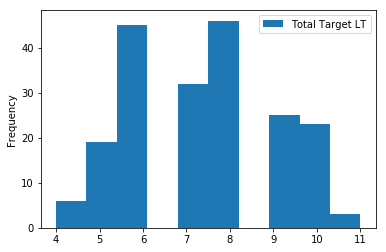

In [73]:
df.plot.hist(x='Product',y='Total Target LT')

In order to ensure I get a positive vlaue for the random selection of Manufacturing and Logistic LTs I decided between the Poissin and Gamma distribution. In this case the gamma distribution is used

In [11]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
df['Actual_MLT'] = np.random.gamma(shape, scale, len(df))
df.head(3)

,Product,Country,MLT,LLT,Total Target LT,Actual_MLT
1,LowEnd,Netherlands,2,3,5,4.523256
2,Better,Spain,5,5,10,1.141025
3,Better,Netherlands,5,3,8,1.104594


https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html


In [12]:
y=np.random.randint(-1,6,1000)
# randn gives a normal distribution which is what i would expect here

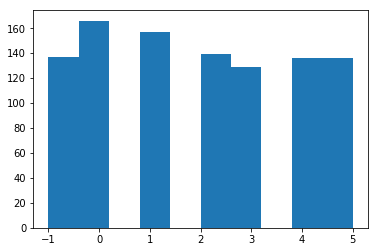

In [13]:
plt.hist(y)
plt.show()

In [14]:
np.random.random_integers(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 5 + 1) instead
  """Entry point for launching an IPython kernel.


2

In [ ]:
y

In [49]:
df2

,0
2018-09-29,-1.050170
2018-09-30,1.914906
2018-10-01,0.161341
2018-10-02,0.601803
2018-10-03,-1.429715
2018-10-04,-0.483708
2018-10-05,-0.456037
2018-10-06,-1.693302
2018-10-07,-0.031606
2018-10-08,-0.260151
